In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [3]:
import sklearn
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,StratifiedKFold, ShuffleSplit, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
loc0 = (r'UntitledspreadsheetSheet1.csv')
#loc1 = (r'housing_test.csv')
train = pd.read_csv(loc0, error_bad_lines=False)
#test = pd.read_csv(loc1, error_bad_lines=False)

In [25]:
print(train.shape)
train.head(10)

(34, 11)


,Firm,GSTIN,DD/MM/YY,Quantity,Price(RS),Amount(RS),Output_Tax(%),GST_Fraud_amount(%),Field,GST_Fraud,fake invoice
0,Pan Loop fast food center,19AMIPA6480G3ZX,28/12/19,1,40.0,40.0,5,0,Food,0,0
1,Nathu Sweets,07AABCN2444B1ZO,20/2/18,1,28.0,28.0,5,0,Food,0,0
2,Nathu Sweets,07AABCN2444B1ZO,20/2/18,1,85.0,85.0,5,0,Food,0,0
3,Nathu Sweets,07AABCN2444B1ZO,20/2/18,1,20.0,20.0,5,0,Food,0,0
4,Sri Krishna Resturant,27AADFH5037M1Z6,1/7/17,1,65.0,65.0,18,0,Food,0,0
5,Aditya Birla Retail,37AAACP2678Q1ZP,11/9/17,1,10.0,10.0,18,0,Food,0,0
6,Aditya Birla Retail,37AAACP2678Q1ZP,11/9/17,2,20.0,40.0,18,0,Food,0,0
7,Aditya Birla Retail,37AAACP2678Q1ZP,11/9/17,2,40.0,80.0,18,0,Food,0,0
8,Citi Super Bazaar Store,28AHGPB7068J1ZJ,16/10/17,1,15.0,15.0,18,0,Food,0,0
9,Citi Super Bazaar Store,28AHGPB7068J1ZJ,16/10/17,2,120.0,240.0,18,0,Food,0,0


In [6]:
train.drop('GSTIN', axis = 1, inplace = True)

Text(0.5, 1.0, 'Correlation between different fearures')

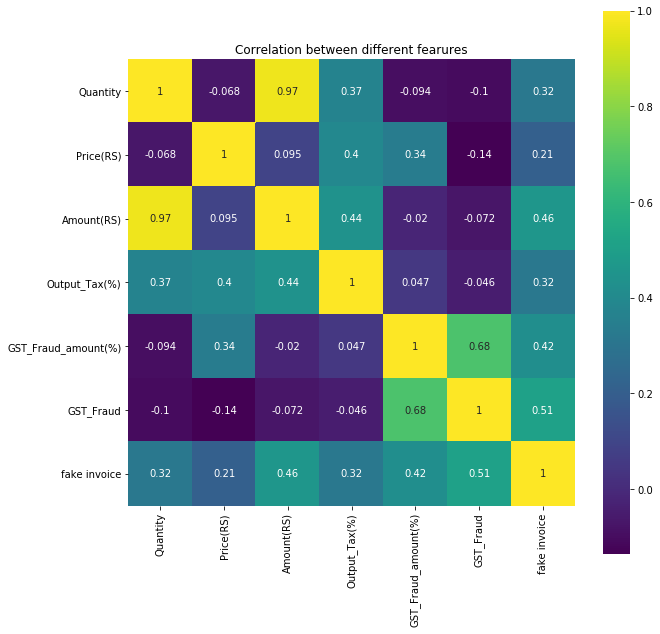

In [7]:
correlation = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [8]:
# Preparing data to be fed to a predictive model
train_Y = train['GST_Fraud']
train = train.drop('GST_Fraud', axis = 1)

In [9]:
train_X.head()

NameError: name 'train_X' is not defined

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
encoded = le.fit_transform(train['Firm'])
#le.inverse_transform(test_Y)

In [11]:
train['Firm'] = encoded

In [12]:
le=LabelEncoder()
encoded = le.fit_transform(train['Field'])
train['Field'] = encoded

In [13]:
le=LabelEncoder()
encoded = le.fit_transform(train['DD/MM/YY'])
train['DD/MM/YY'] = encoded

In [14]:
train

,Firm,DD/MM/YY,Quantity,Price(RS),Amount(RS),Output_Tax(%),GST_Fraud_amount(%),Field,fake invoice
0,12,12,1,40.0,40.0,5,0,4,0
1,10,7,1,28.0,28.0,5,0,4,0
2,10,7,1,85.0,85.0,5,0,4,0
3,10,7,1,20.0,20.0,5,0,4,0
4,15,1,1,65.0,65.0,18,0,4,0
5,3,3,1,10.0,10.0,18,0,4,0
6,3,3,2,20.0,40.0,18,0,4,0
7,3,3,2,40.0,80.0,18,0,4,0
8,5,5,1,15.0,15.0,18,0,4,0
9,5,5,2,120.0,240.0,18,0,4,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(train, train_Y, test_size = 0.2, 
                                                           random_state = 42)
#CVtrain_X, CVtest_X = pd.get_dummies(CVtrain_X), pd.get_dummies(CVtest_X)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

In [19]:
def evaluate_models(number_of_est, maximum_depth, models, X_train, X_test):    
    '''Function to evaluate the performance of a tree based model (based on R2 score), over a grid of
        number of estimators and maximum depth. Function takes in choice of model, array of n_estimators, 
        array of max_depth and training and testing sets'''
    for model_choice in models:
        for n_est in number_of_est:
            for max_d in maximum_depth:
                model = model_choice(n_estimators=n_est, max_depth=max_d, random_state = 42)
                model.fit(X_train, y_train)
                CVpred = model.predict(X_test)
                print(CVpred)
                
                r2 = r2_score(y_test, CVpred)
                f1 = f1_score(y_test, CVpred, average='weighted')
                print(model_choice,',Estimators:',n_est,',Max_Depth:',max_d,',R2:', r2,',f1:', f1)

In [23]:
models = [ GradientBoostingClassifier ]
number_of_est = [3,4,5,20, 30, 40, 50, 60]
#number_of_est = [450,400,300,200, 130, 80, 50, 60]
maximum_depth = [2,3,4,5,8,10]
#maximum_depth = [2,5, 10, 15, 20, 25,30,40,70,100,150]
evaluate_models(number_of_est, maximum_depth, models, X_train, X_test)

[0 0 0 0 0 0 0]
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> ,Estimators: 3 ,Max_Depth: 2 ,R2: -0.3999999999999999 ,f1: 0.5952380952380951
[0 0 0 0 0 0 0]
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> ,Estimators: 3 ,Max_Depth: 3 ,R2: -0.3999999999999999 ,f1: 0.5952380952380951
[0 0 0 0 0 0 0]
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> ,Estimators: 3 ,Max_Depth: 4 ,R2: -0.3999999999999999 ,f1: 0.5952380952380951
[0 0 0 0 0 0 0]
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> ,Estimators: 3 ,Max_Depth: 5 ,R2: -0.3999999999999999 ,f1: 0.5952380952380951
[0 0 0 0 0 0 0]
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> ,Estimators: 3 ,Max_Depth: 8 ,R2: -0.3999999999999999 ,f1: 0.5952380952380951
[0 0 0 0 0 0 0]
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> ,Estimators: 3 ,Max_Depth: 10 ,R2: -0.3999999999999999 ,f1: 0.5952380952380951
[0 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\c

 1.0 ,f1: 1.0
[0 0 1 0 0 1 0]
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> ,Estimators: 20 ,Max_Depth: 2 ,R2: 1.0 ,f1: 1.0
[0 0 1 0 0 1 0]
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> ,Estimators: 20 ,Max_Depth: 3 ,R2: 1.0 ,f1: 1.0
[0 0 1 0 0 1 0]
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> ,Estimators: 20 ,Max_Depth: 4 ,R2: 1.0 ,f1: 1.0
[0 0 1 0 0 1 0]
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> ,Estimators: 20 ,Max_Depth: 5 ,R2: 1.0 ,f1: 1.0
[0 0 1 0 0 1 0]
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> ,Estimators: 20 ,Max_Depth: 8 ,R2: 1.0 ,f1: 1.0
[0 0 1 0 0 1 0]
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> ,Estimators: 20 ,Max_Depth: 10 ,R2: 1.0 ,f1: 1.0
[0 0 1 0 0 1 0]
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> ,Estimators: 30 ,Max_Depth: 2 ,R2: 1.0 ,f1: 1.0
[0 0 1 1 0 1 0]
<class 'sklearn.e

In [15]:
train_X = train
train_X.drop('GST_Fraud_amount(%)', axis = 1, inplace = True)
train_X.drop('fake invoice', axis = 1, inplace = True)

In [16]:
train

,Firm,DD/MM/YY,Quantity,Price(RS),Amount(RS),Output_Tax(%),Field
0,12,12,1,40.0,40.0,5,4
1,10,7,1,28.0,28.0,5,4
2,10,7,1,85.0,85.0,5,4
3,10,7,1,20.0,20.0,5,4
4,15,1,1,65.0,65.0,18,4
5,3,3,1,10.0,10.0,18,4
6,3,3,2,20.0,40.0,18,4
7,3,3,2,40.0,80.0,18,4
8,5,5,1,15.0,15.0,18,4
9,5,5,2,120.0,240.0,18,4


In [35]:
from sklearn.linear_model import LogisticRegression
models = [ GradientBoostingClassifier , LogisticRegression]
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
h=clf.predict(X_test)
clf.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8571428571428571

In [26]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
h

array([0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [29]:
y_test

15    0
19    0
27    1
26    0
8     0
24    1
21    0
Name: GST_Fraud, dtype: int64

In [30]:
X_test

,Firm,DD/MM/YY,Quantity,Price(RS),Amount(RS),Output_Tax(%),Field
15,1,8,23,200.0,4600.0,17,1
19,14,4,5,800.0,4000.0,5,0
27,0,0,2,40.0,80.0,12,4
26,4,1,1,10000.0,10000.0,18,8
8,5,5,1,15.0,15.0,18,4
24,2,2,10,1000.0,10000.0,20,2
21,13,6,1,12000.0,12000.0,18,7
